# Dataset Info

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.

# Task:
To predict churning customers build a machine learning model.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()              

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
df = df[['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.shape

(10127, 20)

In [6]:
df.iloc[1,:]

Attrition_Flag              Existing Customer
Customer_Age                               49
Gender                                      F
Dependent_count                             5
Education_Level                      Graduate
Marital_Status                         Single
Income_Category                Less than $40K
Card_Category                            Blue
Months_on_book                             44
Total_Relationship_Count                    6
Months_Inactive_12_mon                      1
Contacts_Count_12_mon                       2
Credit_Limit                             8256
Total_Revolving_Bal                       864
Avg_Open_To_Buy                          7392
Total_Amt_Chng_Q4_Q1                    1.541
Total_Trans_Amt                          1291
Total_Trans_Ct                             33
Total_Ct_Chng_Q4_Q1                     3.714
Avg_Utilization_Ratio                   0.105
Name: 1, dtype: object

In [7]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [8]:
def cat_plot(x):
    plt.figure(figsize=(16,8))
    sns.countplot(df[x])
    plt.show()
    print(df[x].value_counts(normalize=True))

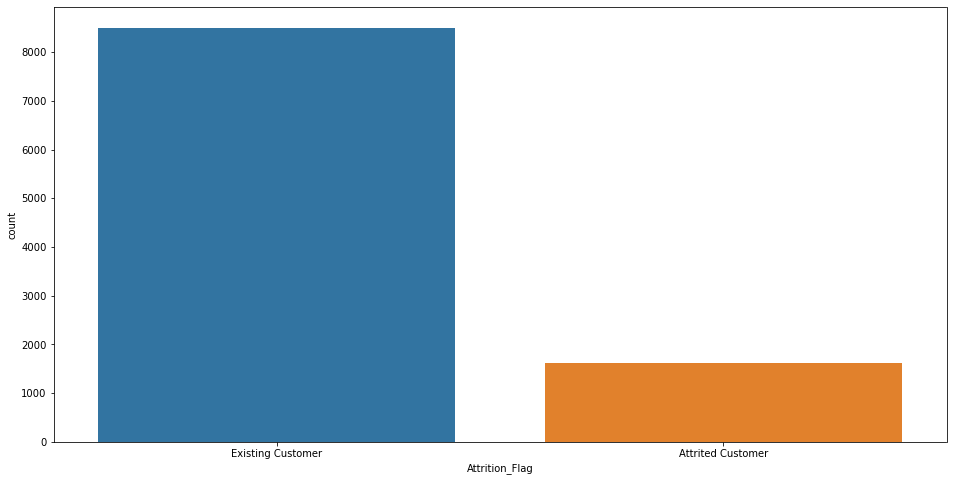

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64


In [9]:
cat_plot('Attrition_Flag')

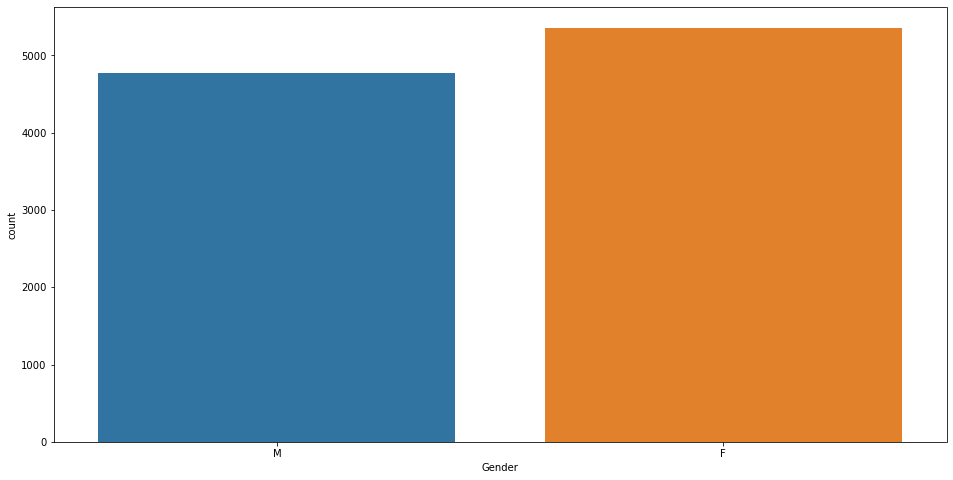

F    0.529081
M    0.470919
Name: Gender, dtype: float64


In [10]:
cat_plot('Gender')

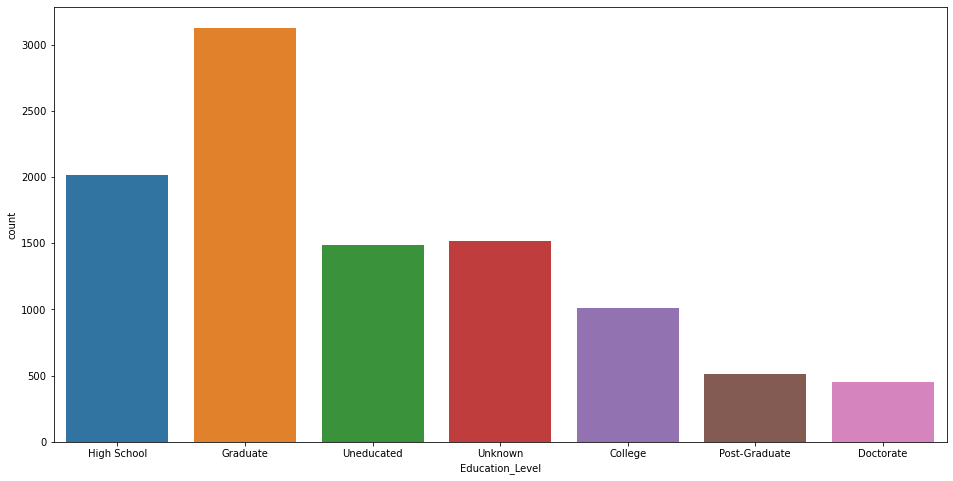

Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64


In [11]:
cat_plot('Education_Level')

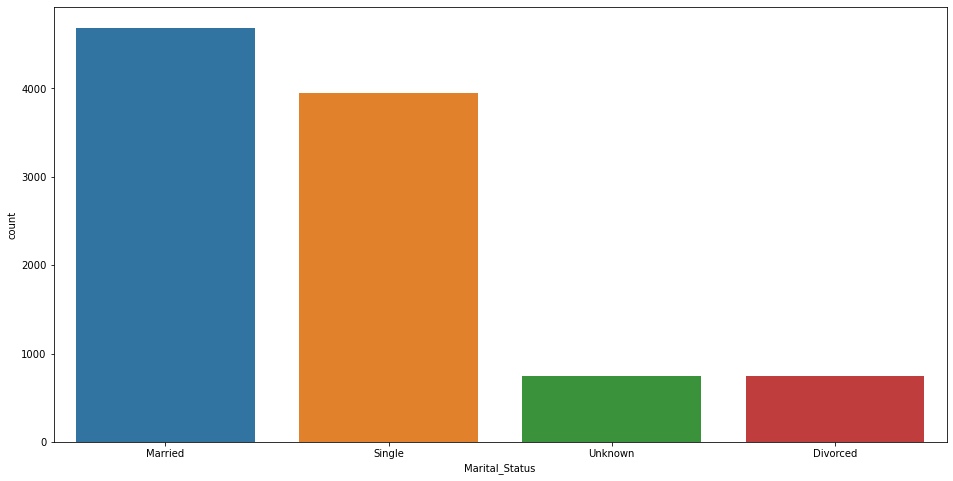

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64


In [12]:
cat_plot('Marital_Status')

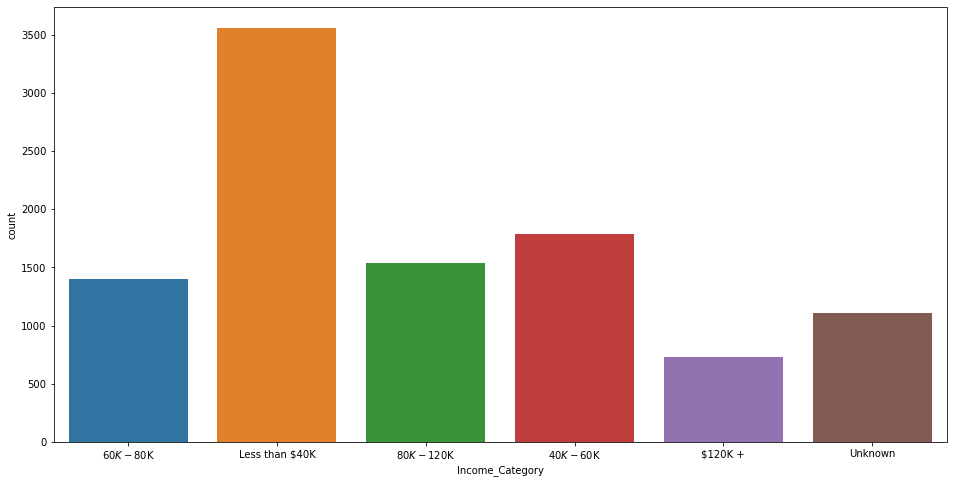

Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
Unknown           0.109805
$120K +           0.071788
Name: Income_Category, dtype: float64


In [13]:
cat_plot('Income_Category')

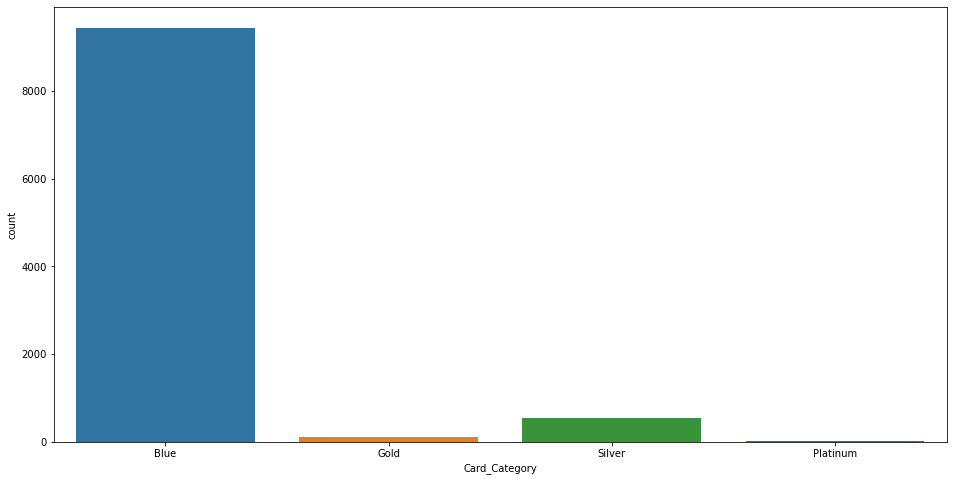

Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64


In [14]:
cat_plot('Card_Category')

In [15]:
num_df = df.select_dtypes(include=np.number)

In [16]:
num_df.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [17]:
import random

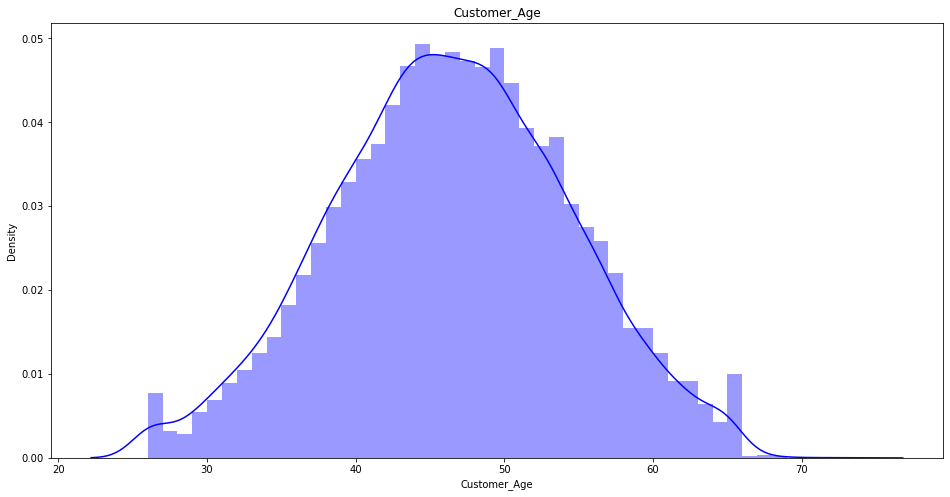

Min: 26
Max: 73
Mean: 46.32596030413745


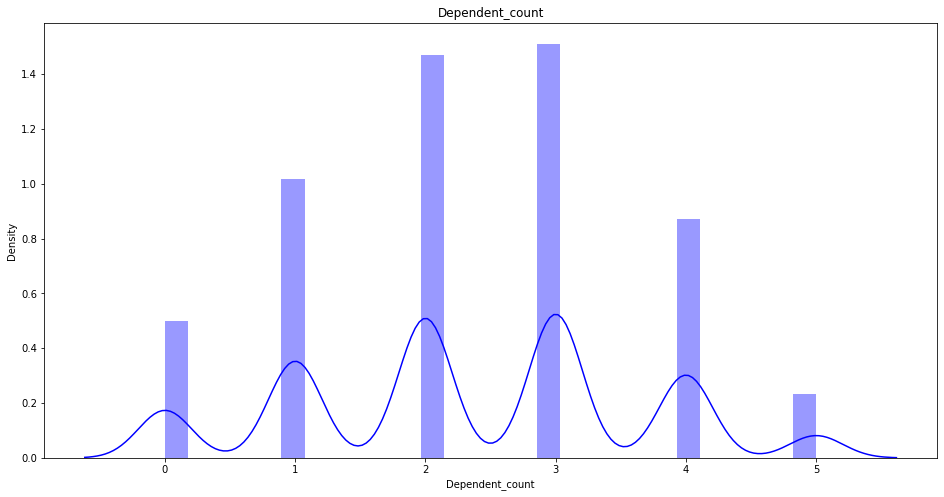

Min: 0
Max: 5
Mean: 2.3462032191172115


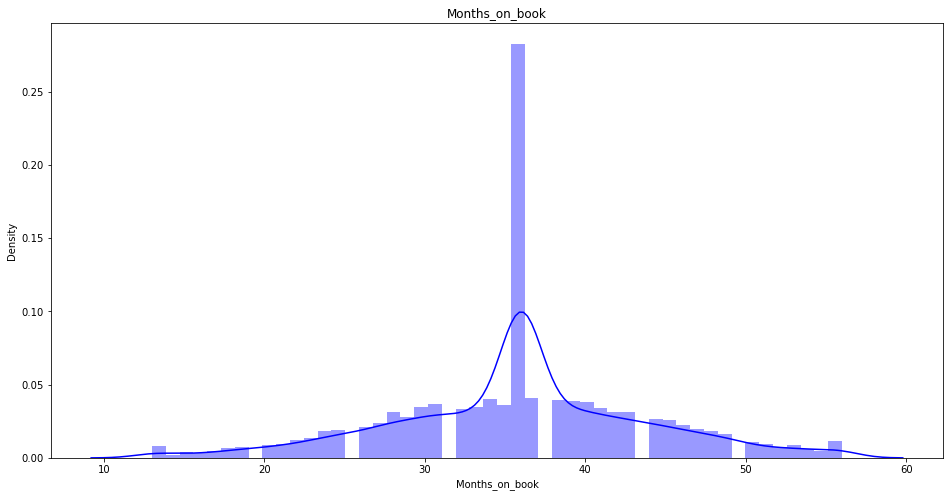

Min: 13
Max: 56
Mean: 35.928409203120374


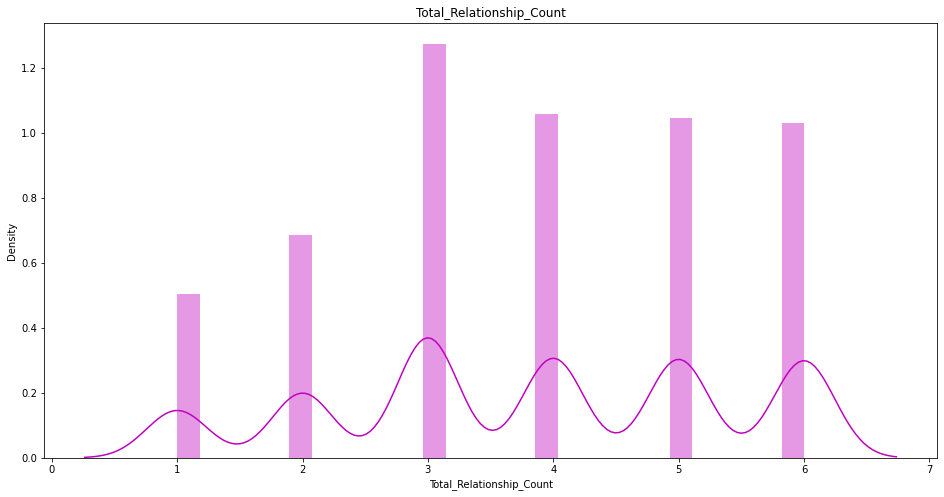

Min: 1
Max: 6
Mean: 3.8125802310654686


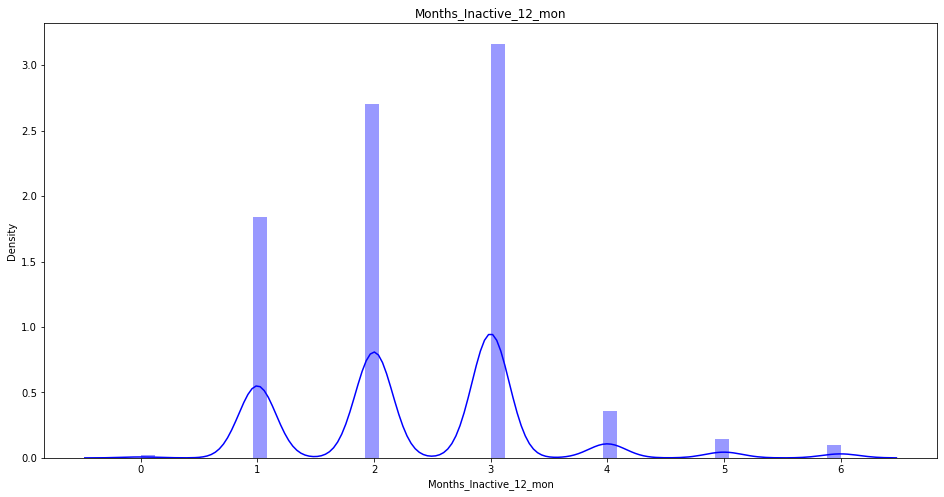

Min: 0
Max: 6
Mean: 2.3411671768539546


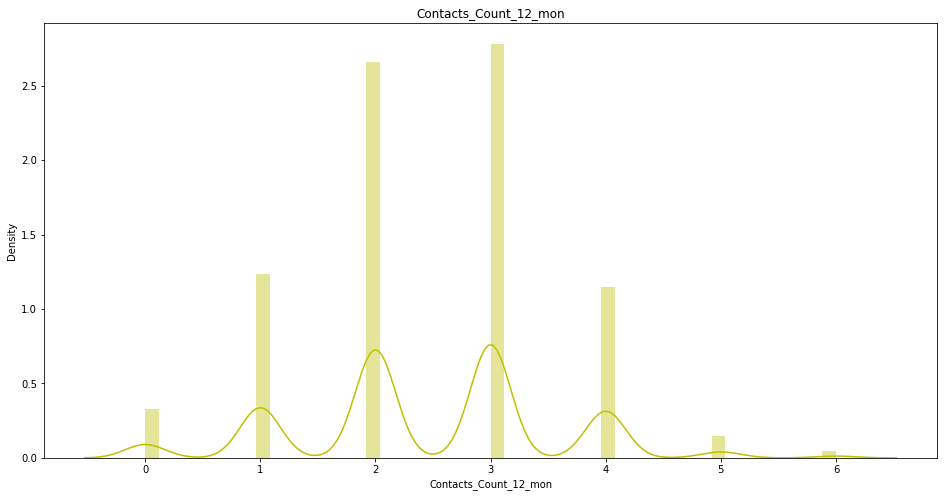

Min: 0
Max: 6
Mean: 2.4553174681544387


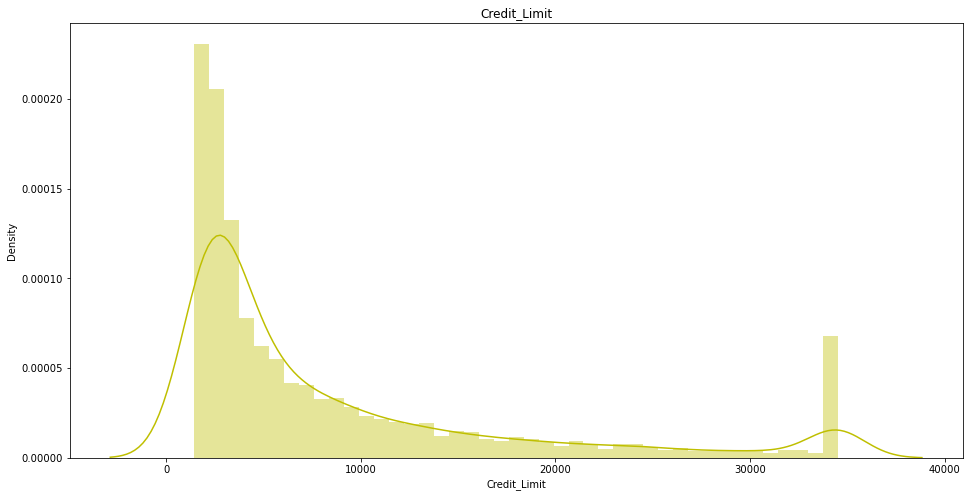

Min: 1438.3
Max: 34516.0
Mean: 8631.953698034955


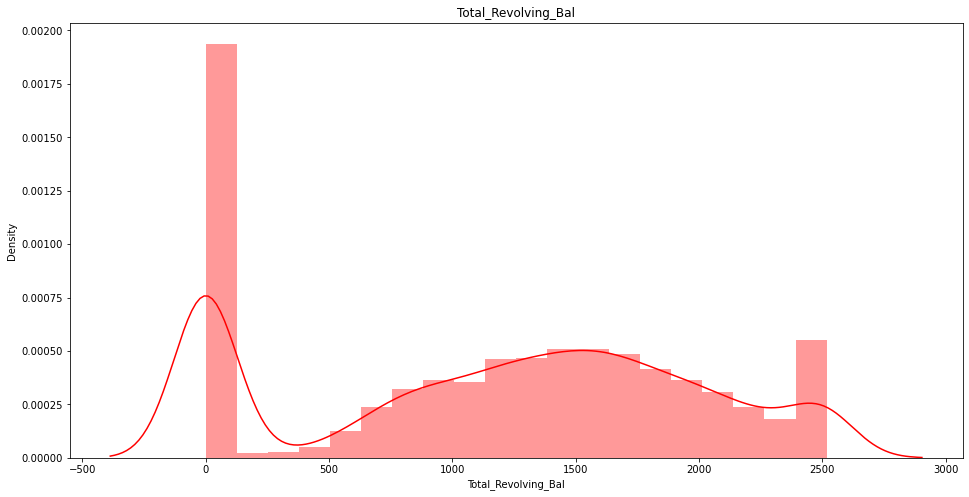

Min: 0
Max: 2517
Mean: 1162.8140614199665


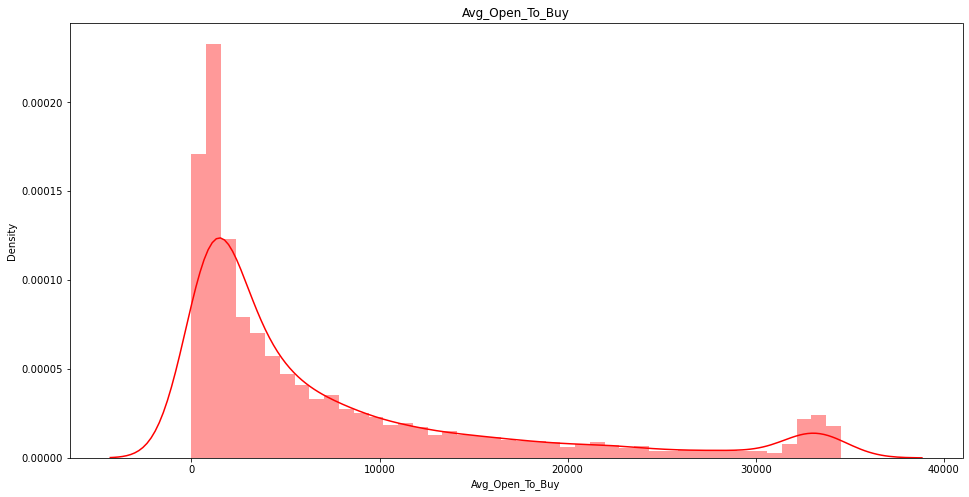

Min: 3.0
Max: 34516.0
Mean: 7469.139636614989


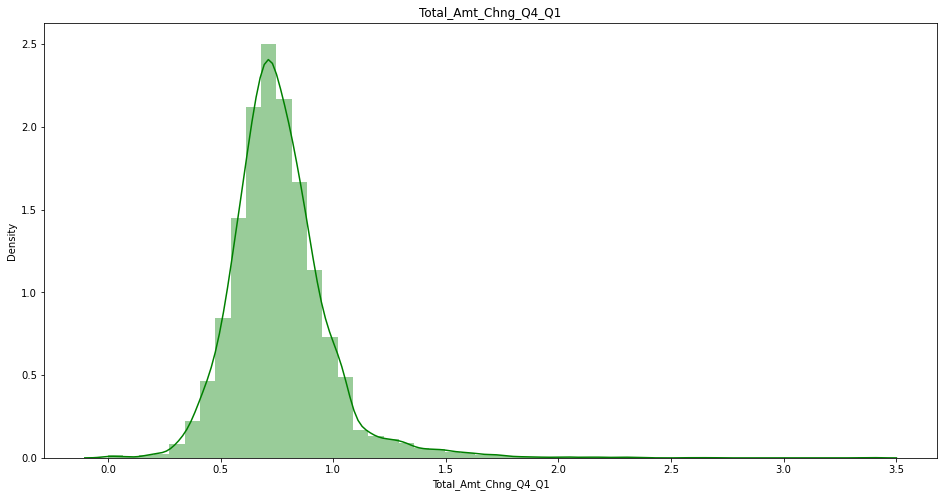

Min: 0.0
Max: 3.397
Mean: 0.759940653698035


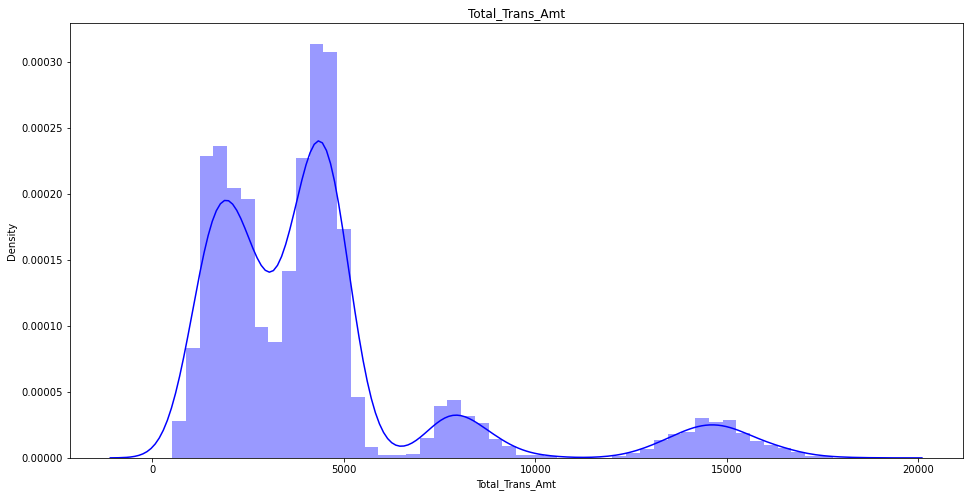

Min: 510
Max: 18484
Mean: 4404.086303939963


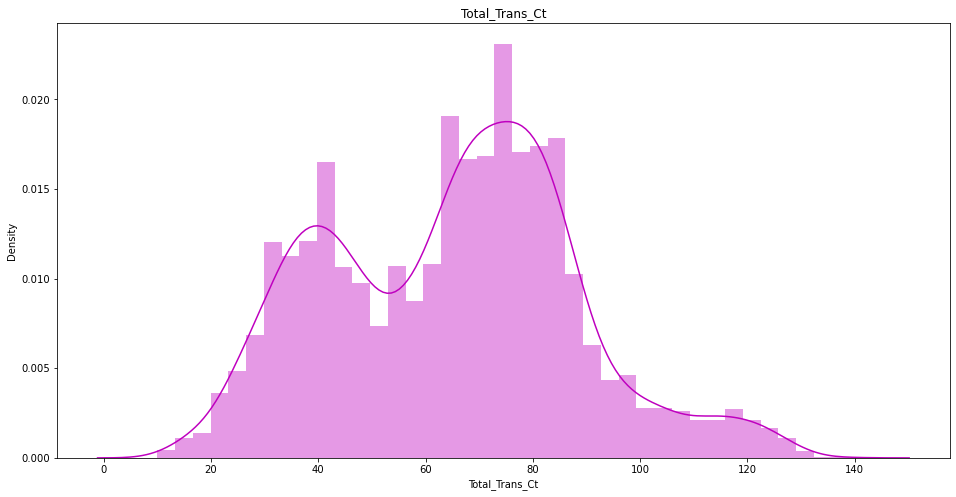

Min: 10
Max: 139
Mean: 64.85869457884863


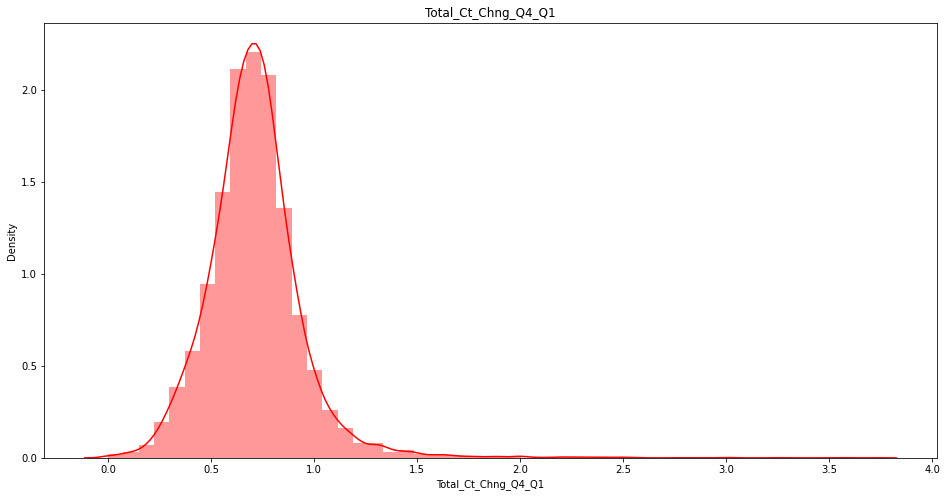

Min: 0.0
Max: 3.714
Mean: 0.7122223758269972


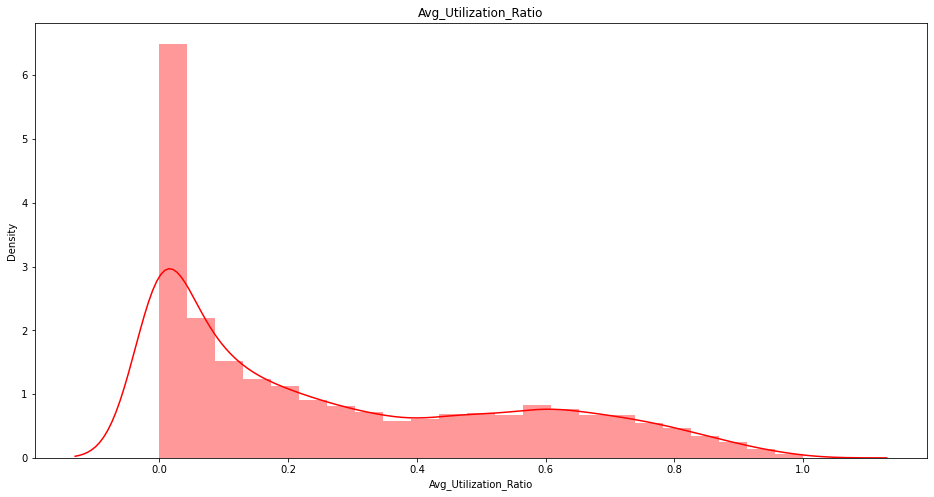

Min: 0.0
Max: 0.9990000000000001
Mean: 0.2748935518909845


In [18]:
for col in num_df.columns:
    plt.figure(figsize=(16,8))
    c = random.choice(['g','r','b','y','m'])
    sns.distplot(num_df[col],color=c)
    plt.title(col)      
    plt.show()     
    
    print('Min:',num_df[col].min())
    print('Max:',num_df[col].max())
    print('Mean:',num_df[col].mean())

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df.select_dtypes(exclude=np.number).columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [21]:
gender_lb = LabelEncoder()
df['Gender'] = gender_lb.fit_transform(df['Gender'])

In [22]:
edu_lb = LabelEncoder()
df['Education_Level'] = edu_lb.fit_transform(df['Education_Level'])

In [23]:
mari_lb = LabelEncoder()
df['Marital_Status'] = mari_lb.fit_transform(df['Marital_Status'])

In [24]:
inc_lb = LabelEncoder()
df['Income_Category'] = inc_lb.fit_transform(df['Income_Category'])

In [25]:
card_lb = LabelEncoder()
df['Card_Category'] = card_lb.fit_transform(df['Card_Category'])

In [26]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                        int32
Dependent_count               int64
Education_Level               int32
Marital_Status                int32
Income_Category               int32
Card_Category                 int32
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

# NULL CHECK

In [27]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Train

In [28]:
x = df.drop('Attrition_Flag',axis=1).values
y = df['Attrition_Flag'].values

In [29]:
std = StandardScaler()
x = std.fit_transform(x)

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=100)

In [31]:
x_test.shape

(2026, 19)

In [32]:
np.unique(y_test)

array(['Attrited Customer', 'Existing Customer'], dtype=object)

In [33]:
x_train.shape

(8101, 19)

# Model - 1

In [34]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.8395853899308984

In [36]:
accuracy_score(y_train,lr.predict(x_train))

0.8445870880138254

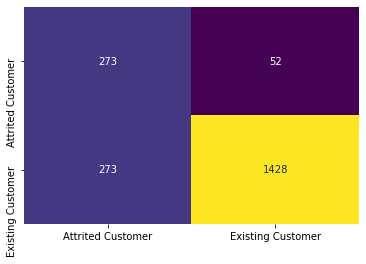

In [37]:
lr_cm = confusion_matrix(y_test,y_pred)
lr_df = pd.DataFrame(data=lr_cm,columns=['Attrited Customer', 'Existing Customer'],index=['Attrited Customer', 'Existing Customer'])
sns.heatmap(lr_df,annot=True,cbar=False,fmt='d',cmap='viridis')
plt.show()

# Model - 2

In [38]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.9550839091806516

In [40]:
accuracy_score(y_train,rf.predict(x_train))

1.0

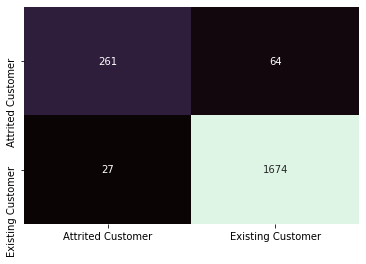

In [41]:
lr_cm = confusion_matrix(y_test,y_pred)
lr_df = pd.DataFrame(data=lr_cm,columns=['Attrited Customer', 'Existing Customer'],index=['Attrited Customer', 'Existing Customer'])
sns.heatmap(lr_df,annot=True,cbar=False,fmt='d',cmap='mako')
plt.show()